In [19]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import pandas as pd

In [14]:
# 100개의 데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, 
                              coef=True, random_state=1)

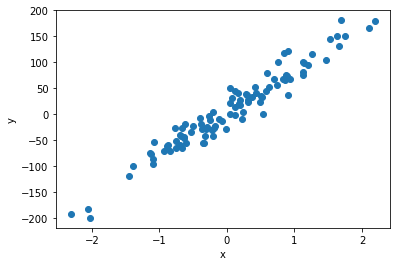

In [15]:
plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [16]:
# 레버리지가 높은 가상의 데이터를 추가

data_100 = (4, 300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])
X = sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

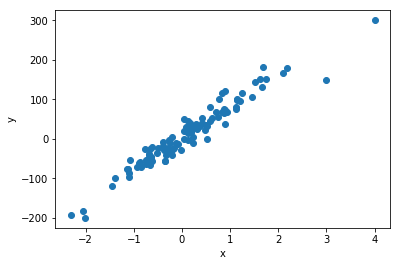

In [17]:
plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [21]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Mon, 09 Jul 2018   Prob (F-statistic):           1.61e-61
Time:                        15:39:08   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

In [35]:
hat

array([0.01516695, 0.01119963, 0.01107744, 0.01374277, 0.02878656,
       0.01041415, 0.01125576, 0.01606417, 0.03257963, 0.01014885,
       0.01553914, 0.01250262, 0.02459694, 0.01565692, 0.02457942,
       0.01460505, 0.01021012, 0.0120643 , 0.01605503, 0.0239386 ,
       0.01165165, 0.05129059, 0.0151323 , 0.00985232, 0.01237359,
       0.01626123, 0.00986235, 0.01183083, 0.02220309, 0.0174345 ,
       0.01203702, 0.01991263, 0.0098375 , 0.01528896, 0.01475726,
       0.01372415, 0.01198596, 0.03378783, 0.06764843, 0.01612402,
       0.04792128, 0.02724502, 0.0190858 , 0.01971908, 0.01179221,
       0.01542131, 0.00981397, 0.0196743 , 0.01228633, 0.01117811,
       0.0109163 , 0.00980453, 0.01186491, 0.01016148, 0.01638805,
       0.01298791, 0.02104222, 0.01086322, 0.01139019, 0.01349858,
       0.01058338, 0.00980472, 0.01755271, 0.01065946, 0.01009433,
       0.02562309, 0.00983591, 0.02089362, 0.01528715, 0.0250016 ,
       0.03402463, 0.01100677, 0.03174496, 0.01214893, 0.01631

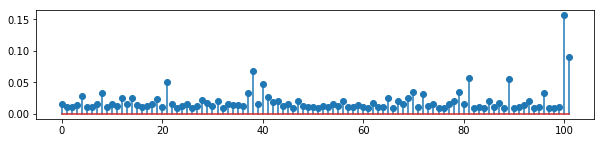

In [29]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize = (10, 2))
plt.stem(hat)
plt.show()

In [30]:
hat.sum()

2.0000000000000004

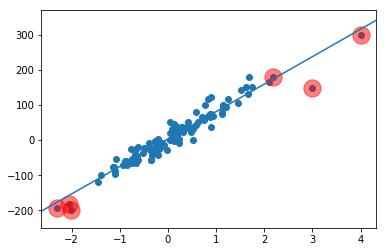

In [41]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05 # 0.05가 넘는 hat만 idx에 True 나타나게 함
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.show()

### 레버리지의 영향

    - 레버리지가 큰 데이터가 모형에 주는 영향을 보기 위해 레버리지 큰 것 포함된 경우와 포함되지 않은 경우의 모형을 아래에 비교

In [45]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


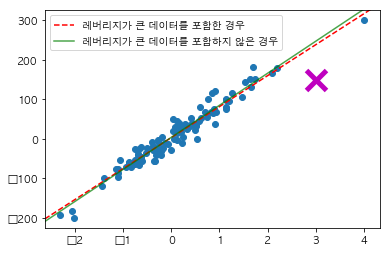

In [53]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)


sm.graphics.abline_plot(model_results=result,
                       c='r', linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                       c="g", alpha=0.7, ax=ax)


plt.plot(X0[-1], y[-1], marker='x', c='m', ms=20, mew=5)
plt.legend(["레버리지가 큰 데이터를 포함한 경우", "레버리지가 큰 데이터를 포함하지 않은 경우"],
          loc="upper left")
plt.show()

    - 레버리지가 큰 데이터는 포함되는 경우 모형에 주는 영향이 크다.

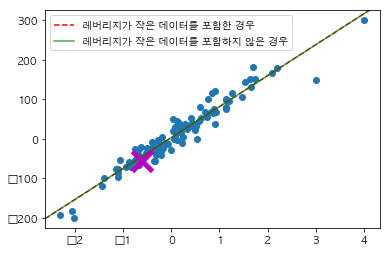

In [54]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"], 
           loc="upper left")
plt.show()

    - 레버리지가 작은 데이터가 포함되거나 포함되지않거나 둘다 모형에 영향을 주지 않음

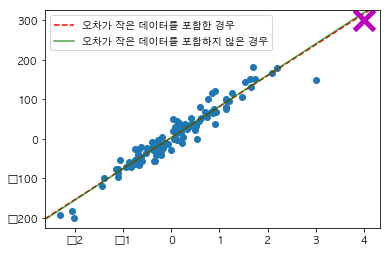

In [55]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, 
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4, 
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"오차가 작은 데이터를 포함한 경우", u"오차가 작은 데이터를 포함하지 않은 경우"], 
           loc="upper left")
plt.show()

    - 레버리지는 크지만 오차가 작은 데이터는 포함 유무에 따라 모형에 영향을 끼치지 않음

### 아웃라이어

    - 모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터
    - 잔차가 큰 데이터
    - 잔차의 크기는 독립 변수의 영향을 받으므로 아웃라이어를 찾으려면 이 영향을 제거한 표준화된 잔차를 계산해야 한다.

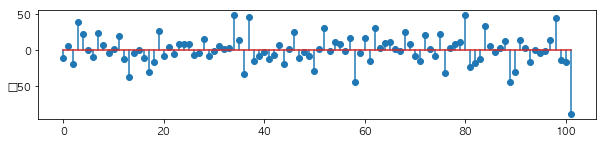

In [56]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.show()

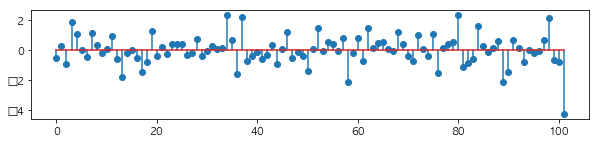

In [57]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.show()

표준화 잔차는 `resid_pearson` 속성에 있다.

### Cook's Distance

$\Large D_{i} = \frac{r_{i}^{2}}{RSS}[\frac{h_{ii}}{(1-h_{ii})^{2}}]$

    - 잔차와 레버리지를 동시에 보기위한 기준이 된다.

    - 회귀분석에는 잔차의 크기가 큰 데이터가 아웃라이어이다. 특히, 레버리지와 잔차의 크기가 모두 큰 데이터에 관심을 가져야 한다.

    - 레버리지가 커지거나 잔차의 크기가 커지면 Cook's Distance 값이 커진다.

    - Fox' Outlier Recommendation 은 Cook'sDistnace가 다음과 같은 기준값보다 클 대 아웃라이어로 판단하자는 것을 제시
    
$\Large D_{i}>\frac{4}{N-K-1}$

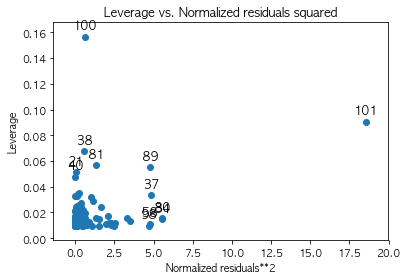

In [58]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

`plot_leverage_resid2` : x축은 표준화 잔차의 제곱, y축은 leverage 나타냄

데이터 아이디 표시 된 값들이 레버리지가 큰 아웃라이어들이다.

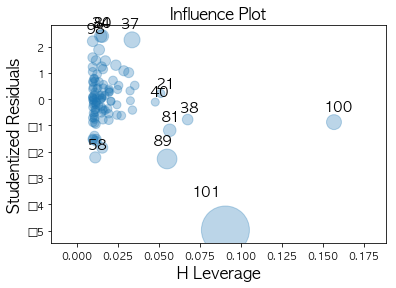

In [60]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

`influence_plot` : Cook's distance를 버블 크기로 표시

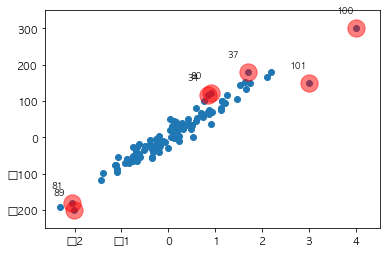

In [61]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(y) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]

ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()

In [64]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

In [65]:
influence_boston = result_boston.get_influence()

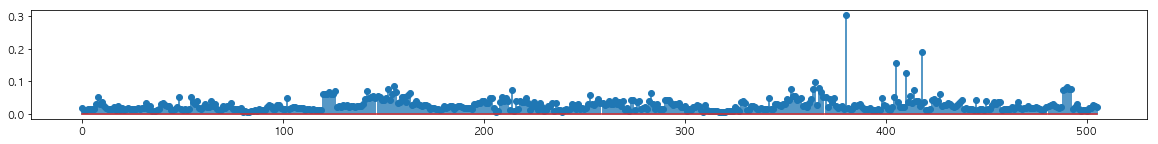

In [74]:
hat = influence_boston.hat_matrix_diag

plt.figure(figsize=(20,2))
plt.stem(hat)
plt.show()

In [75]:
# 레버리지의 합
hat.sum()

13.999999999999998

In [82]:
cooks_d2, pvals = influence_boston.cooks_distance
fox_cr = 4/ (len(y) -2)
idx = np.where(cooks_d2 > fox_cr)[0]

idx = np.hstack([idx, np.where(boston.target == 50)[0]])
idx

array([214, 364, 365, 367, 368, 369, 370, 371, 372, 412, 161, 162, 163,
       166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])

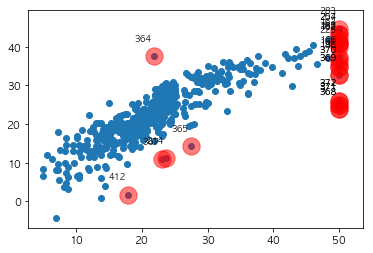

In [84]:
ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx], pred[idx], s=300, c="r", alpha = 0.5)
utils.annotate_axes(range(len(idx)), idx,
                   list(zip(dfy.MEDV[idx], pred[idx])), [(-20, 15)] * len(idx), size = "small", ax=ax)
plt.show()

In [85]:
idx2 = list(set(range(len(dfX))).difference(idx))
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     156.0
Date:                Mon, 09 Jul 2018   Prob (F-statistic):          2.67e-161
Time:                        17:28:17   Log-Likelihood:                -1285.3
No. Observations:                 485   AIC:                             2599.
Df Residuals:                     471   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9296      4.108      4.608      0.0